In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Dropping Irrelevant Features

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Encoding Categorical Data

In [9]:
df = pd.get_dummies(df,drop_first = True)

In [10]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


## Some insights about the target variable 

<Axes: xlabel='Exited', ylabel='count'>

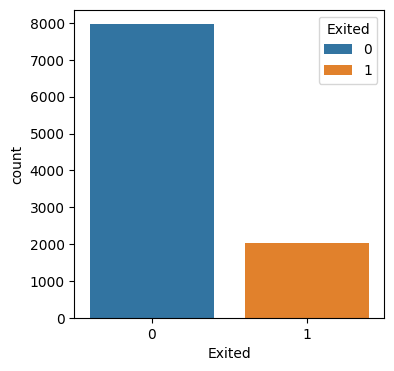

In [23]:
plt.figure(figsize=(4,4))
sns.countplot(x='Exited', data=df,hue=df['Exited'])

In [12]:
X = df.drop('Exited',axis=1)
y = df['Exited']

## Handling Imbalanced Data with SMOTE

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [15]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

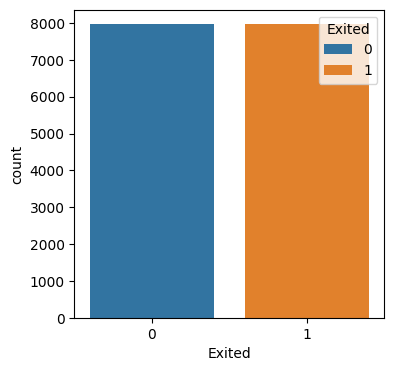

In [22]:
plt.figure(figsize=(4,4))
sns.countplot(x=y_res,hue=y_res)

## Splitting The Dataset into Training Set and Test Set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.4, random_state=42)

## Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [26]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
X_train

array([[-1.0202987 , -0.29832852,  1.17286855, ..., -0.75925788,
         1.56229428,  0.81134356],
       [-0.62762235, -0.59988671, -1.0374649 , ..., -0.75925788,
         1.56229428,  0.81134356],
       [ 0.93217541,  0.20426846,  1.54125745, ..., -0.75925788,
        -0.64008427,  0.81134356],
       ...,
       [ 0.1904534 ,  0.20426846,  1.17286855, ..., -0.75925788,
        -0.64008427,  0.81134356],
       [ 0.49586834,  1.00842363, -0.66907599, ..., -0.75925788,
         1.56229428,  0.81134356],
       [ 0.5176837 ,  1.00842363, -1.40585381, ...,  1.31707556,
        -0.64008427,  0.81134356]])

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred1 = log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    """Evaluate the model using various classification metrics."""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)  # Handle division by zero
    recall = recall_score(y_true, y_pred, zero_division=0)        # Handle division by zero
    f1 = f1_score(y_true, y_pred, zero_division=0)                # Handle division by zero
    
    print("Model Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return accuracy, precision, recall, f1

evaluate_model(y_test, y_pred1)

Model Evaluation Metrics:
Accuracy: 0.7732
Precision: 0.7686
Recall: 0.7752
F1 Score: 0.7719


## SVC

In [31]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [32]:
y_pred2=svm.predict(X_test)

In [33]:
evaluate_model(y_test, y_pred2)

Model Evaluation Metrics:
Accuracy: 0.8313
Precision: 0.8383
Recall: 0.8167
F1 Score: 0.8274


## KNeighbors Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [35]:
y_pred3=knn.predict(X_test)

In [36]:
evaluate_model(y_test, y_pred3)

Model Evaluation Metrics:
Accuracy: 0.8146
Precision: 0.8109
Recall: 0.8158
F1 Score: 0.8133


## Desicion Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
y_pred4=dt.predict(X_test)

In [40]:
evaluate_model(y_test, y_pred4)

Model Evaluation Metrics:
Accuracy: 0.7963
Precision: 0.7854
Recall: 0.8098
F1 Score: 0.7974


## Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
y_pred5=rf.predict(X_test)


In [43]:
evaluate_model(y_test, y_pred5)

Model Evaluation Metrics:
Accuracy: 0.8562
Precision: 0.8617
Recall: 0.8453
F1 Score: 0.8534


In [45]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF'],
    'ACC':[accuracy_score(y_test,y_pred1),
           accuracy_score(y_test,y_pred2),
           accuracy_score(y_test,y_pred3),
           accuracy_score(y_test,y_pred4),
           accuracy_score(y_test,y_pred5),
          ],
    'PRECISION':[precision_score(y_test,y_pred1),
           precision_score(y_test,y_pred2),
           precision_score(y_test,y_pred3),
           precision_score(y_test,y_pred4),
           precision_score(y_test,y_pred5),
          ],
    'RECALL':[recall_score(y_test,y_pred1),
           recall_score(y_test,y_pred2),
           recall_score(y_test,y_pred3),
           recall_score(y_test,y_pred4),
           recall_score(y_test,y_pred5),
          ],
    'F1':[f1_score(y_test,y_pred1),
           f1_score(y_test,y_pred2),
           f1_score(y_test,y_pred3),
           f1_score(y_test,y_pred4),
           f1_score(y_test,y_pred5),
          ]

})

In [47]:
display(performance_summary)

,Model,ACC,PRECISION,RECALL,F1
0,LR,0.773191,0.768626,0.775206,0.771902
1,SVC,0.831267,0.838269,0.816741,0.827365
2,KNN,0.814629,0.810905,0.815789,0.813340
3,DT,0.796264,0.785363,0.809765,0.797377
4,RF,0.856224,0.861668,0.845276,0.853393
